In [61]:
import matplotlib.pyplot as plt 
import numpy as np  
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

timestamp_dataset = []
refSt_dataset = []
sensor_o3_dataset = []
temp_dataset = []
hum_dataset = []
index_list = []

index = 0
with open('data.csv', 'r') as f:
    # if the first row is the header
    for row in f:
        if index == 0:
            index += 1
            continue

        row = row.split(';')
        date = row[0]
        refSt = row[1]
        sensor_o3 = row[2]
        temp = row[3]
        hum = row[4]
        index_list.append(index)

        timestamp_dataset.append(date)
        refSt_dataset.append(float(refSt))
        sensor_o3_dataset.append(float(sensor_o3))
        temp_dataset.append(float(temp))
        hum_dataset.append(float(hum))

        index += 1

1.0


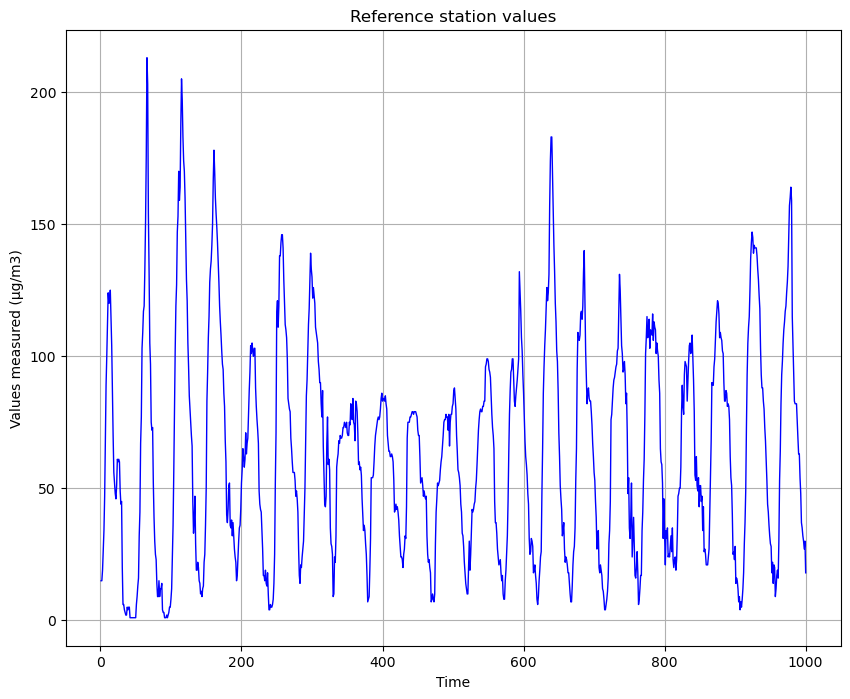

16.080459770114942
5.643939393939394


In [62]:
print(min(refSt_dataset))
plt.figure(figsize=(10, 8))
plt.plot(index_list, refSt_dataset, color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Values measured (µg/m3)')
plt.title('Reference station values')
plt.grid(True)  # Add grid
plt.show()

high_value_list = []
low_value_list = []
for i in range(len(refSt_dataset)):
    if refSt_dataset[i] > 70:
        high_value_list.append(i)
    elif refSt_dataset[i] < 30:
        low_value_list.append(i)

time_sum = 0
for i in high_value_list:
    split = timestamp_dataset[i].split(' ')
    split = split[1].split(':')
    time_sum += int(split[0])
print(time_sum/len(high_value_list))
time_sum = 0

for i in low_value_list:
    split = timestamp_dataset[i].split(' ')
    split = split[1].split(':')
    time_sum += int(split[0])
print(time_sum/len(low_value_list))
    

In the previous scatterplot we can see the values measured by the reference stations. It is possible to observe that the maximum value is around 210 and the minumum value is around 1. Besides we can notice that the scatterplot follows a periodically oscillation along the time. 

By the dataset we can also assert that there are high values of O_3 around the 16:00 while there are low values around the 05:30.
Notice that the reference data read data in µg/m3.

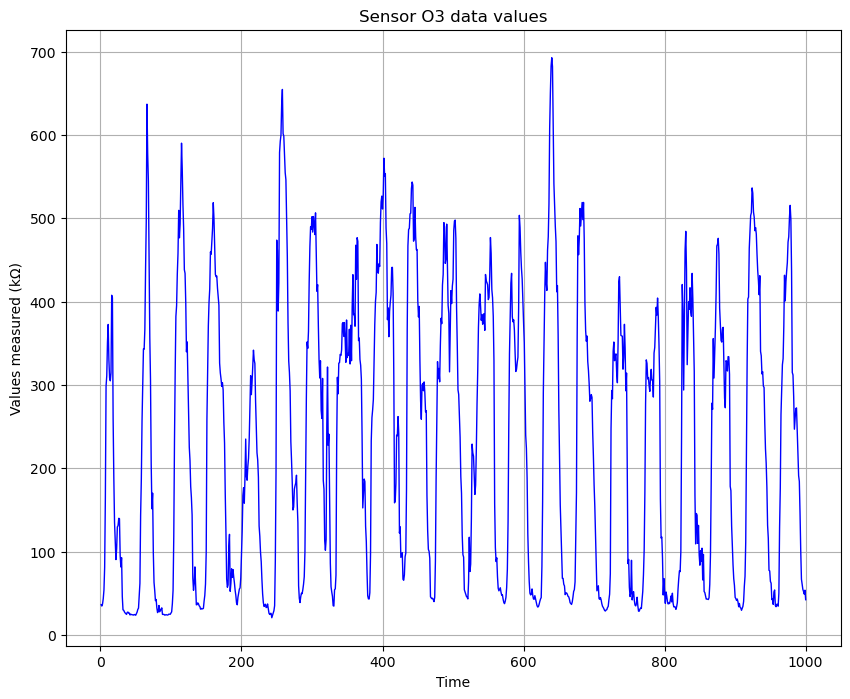

692.5613
14.086455331412104
6.64


In [63]:

plt.figure(figsize=(10, 8))
plt.plot(index_list, sensor_o3_dataset, color='blue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Values measured (kΩ)')
plt.title('Sensor O3 data values')
plt.grid(True)  # Add grid
plt.show()
print(str(max(sensor_o3_dataset)))

high_value_list = []
low_value_list = []
for i in range(len(sensor_o3_dataset)):
    if sensor_o3_dataset[i] > 70:
        high_value_list.append(i)
    elif sensor_o3_dataset[i] < 30:
        low_value_list.append(i)

time_sum = 0
for i in high_value_list:
    split = timestamp_dataset[i].split(' ')
    split = split[1].split(':')
    time_sum += int(split[0])
print(time_sum/len(high_value_list))
time_sum = 0

for i in low_value_list:
    split = timestamp_dataset[i].split(' ')
    split = split[1].split(':')
    time_sum += int(split[0])
print(time_sum/len(low_value_list))

In the previous scatterplot we can see the data of O3 measeured by the sensors in the zone. We can see that the minimum value is around 20 and the maimum value is around 700. The interval of values is very large compared with the reference station values. Also in this case we can see that the scatterplot follow a periodic oscillascion along the time. 

Besides we can assert that the high values have been measured is around 14:00 while the low values have been measured around 06:30. These measurements are slightly different from those of the reference station.
Notice that in this case the values are in kΩ, for this reason the scale is completly different from the reference data scale.

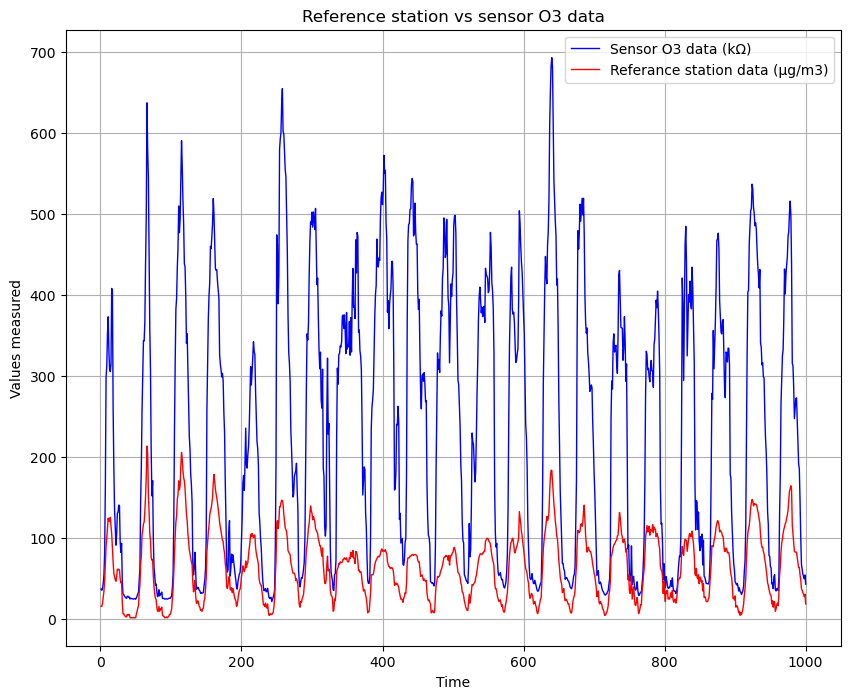

RMSE = 217.8177105348495
-25.986980660864944


In [82]:
plt.figure(figsize=(10, 8))
plt.plot(index_list, sensor_o3_dataset, color='blue', label='Sensor O3 data (kΩ)', linewidth=1)
plt.plot(index_list, refSt_dataset, color='red', label='Referance station data (µg/m3)', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Values measured')
plt.legend()
plt.grid(True)  # Add grid
plt.title('Reference station vs sensor O3 data')
plt.show()

def calculate_rmse(X, Y):
    difference = X - Y
    squared_diff = difference**2
    mean_square_diff = np.mean(squared_diff)
    rmse = np.sqrt(mean_square_diff)
    print(f"RMSE = {rmse}")
    return rmse


from sklearn.metrics import r2_score
calculate_rmse(np.array(refSt_dataset), np.array(sensor_o3_dataset))
r2 = r2_score(np.array(refSt_dataset), np.array(sensor_o3_dataset))
print(r2)

The scatterplot reveals that the sensor data values have a larger range compared to the reference station data, but this is caused by the different unit of measurement that differnt systems use to collect data.
Both the sensor data and reference station data show a periodic oscillation pattern over time. This pattern suggests a recurring trend in the measured values. From the plots we can see the differences in the measured values and identify any discrepancies between the two datasets.

Since they have different unit of measurements, now I am going to normilize the data and try to compare them better

RMSE = 0.457313855027064


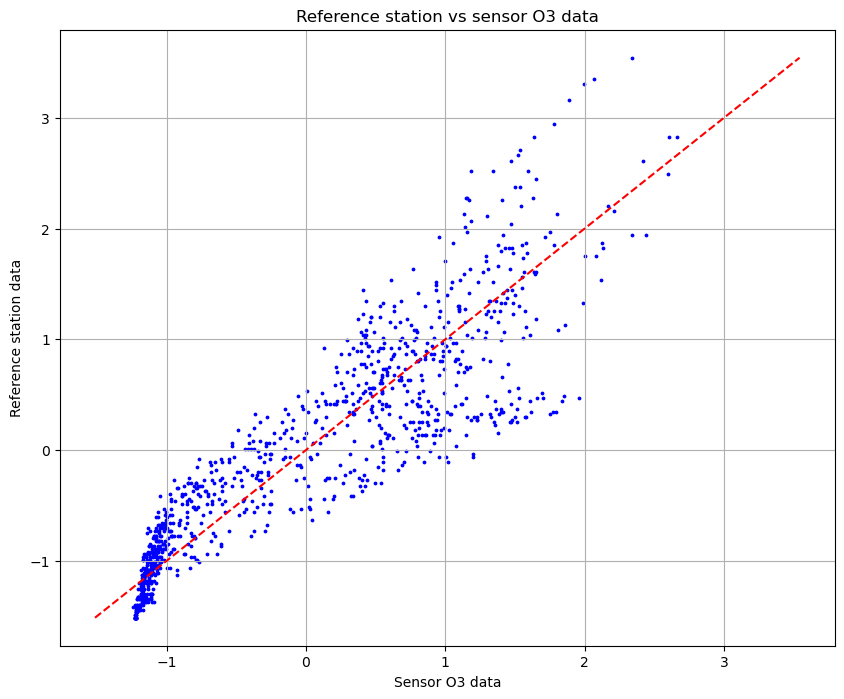

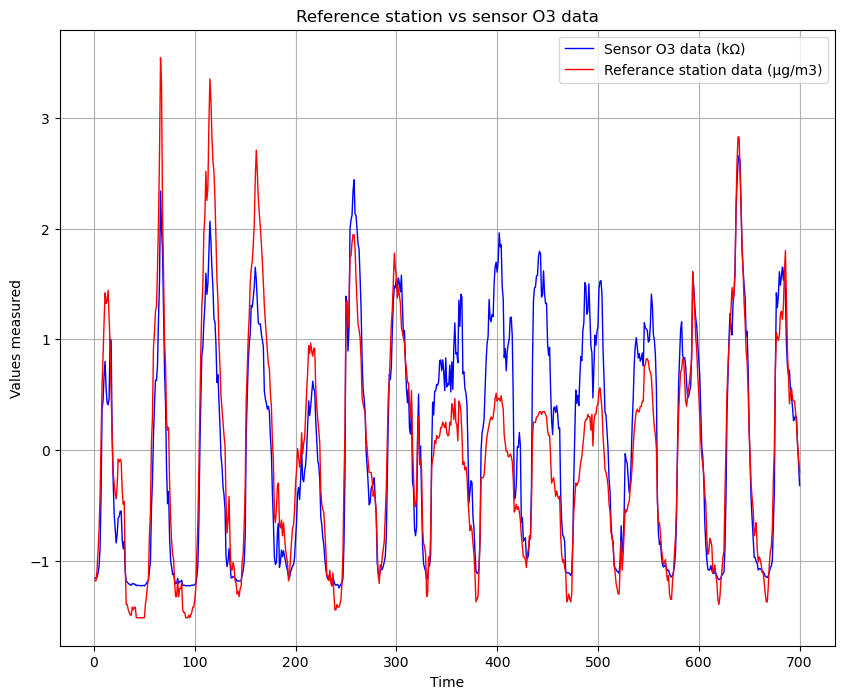

In [65]:
# normliaze the reference station data
mean_refSt = np.mean(refSt_dataset)
sd_refSt = np.std(refSt_dataset)
normal_refSt_dataset = []
index = 0
for index in range(len(refSt_dataset)):
    value = refSt_dataset[index]
    value = (value - mean_refSt)/np.sqrt(sd_refSt**2)
    normal_refSt_dataset.append(value)

def calculate_rmse(X, Y):
    difference = X - Y
    squared_diff = difference**2
    mean_square_diff = np.mean(squared_diff)
    rmse = np.sqrt(mean_square_diff)
    print(f"RMSE = {rmse}")
    return rmse

# normalize the sensor data
mean_sensor = np.mean(sensor_o3_dataset)
sd_sensor = np.std(sensor_o3_dataset)
normal_o3_dataset = []
index = 0
for index in range(len(sensor_o3_dataset)):
    value = sensor_o3_dataset[index]
    value = (value - mean_sensor)/np.sqrt(sd_sensor**2)
    normal_o3_dataset.append(value)

# calculate the rmse
calculate_rmse(np.array(normal_refSt_dataset), np.array(normal_o3_dataset))

plt.figure(figsize=(10, 8))
plt.scatter(normal_o3_dataset, normal_refSt_dataset, s=3, color='blue')
plt.xlabel('Sensor O3 data')
plt.ylabel('Reference station data')
M = max(max(normal_refSt_dataset), max(normal_o3_dataset))
m = min(min(normal_refSt_dataset), min(normal_o3_dataset))
plt.plot([m, M], [m, M], ls="--",c='red')
plt.grid(True)  # Add grid
plt.title('Reference station vs sensor O3 data')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(index_list[:700], normal_o3_dataset[:700], color='blue', label='Sensor O3 data (kΩ)', linewidth=1)
plt.plot(index_list[:700], normal_refSt_dataset[:700], color='red', label='Referance station data (µg/m3)', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Values measured')
plt.legend()
plt.grid(True)  # Add grid
plt.title('Reference station vs sensor O3 data')
plt.show()

From this plot we can see how the two dataset are correlated between them. We can see that they follow a linear function of 45° (that it means y=x). In fact I put on the x-axis the normalized data of the sensors, while on the y-axis I put the normalized data of the reference data. The normalization allows to compare datasets with different scales of data between them. From the normalization we obtain mean=0 and standard deviation=1.

Now I normalize also temperature and humidity and I compare with reference station data and sensor data.

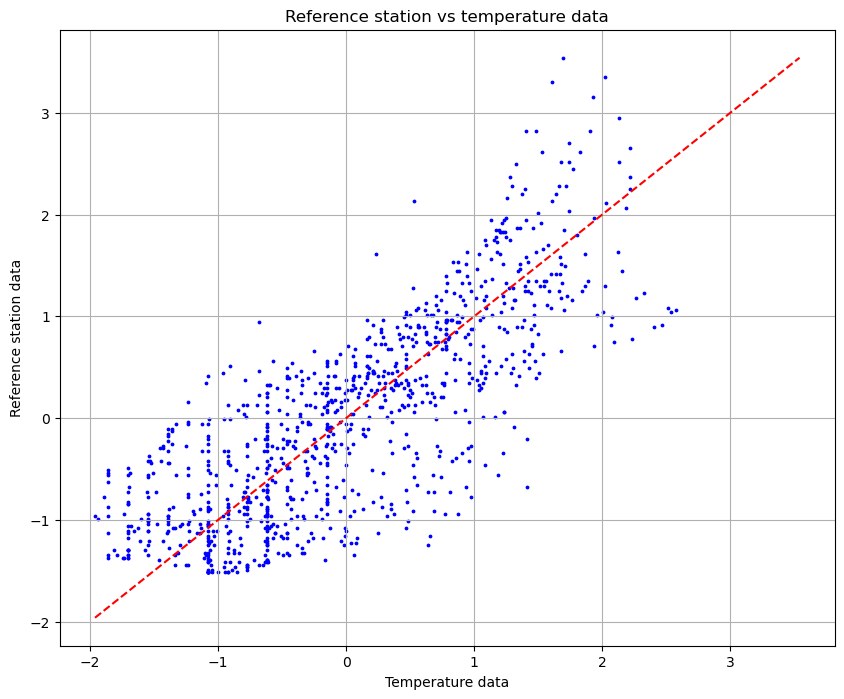

In [66]:
# normalize the temperature data
mean_temp = np.mean(temp_dataset)
sd_temp = np.std(temp_dataset)
normal_temp_dataset = []
index = 0
for index in range(len(temp_dataset)):
    value = temp_dataset[index]
    value = (value - mean_temp)/np.sqrt(sd_temp**2)
    normal_temp_dataset.append(value)

# normalize the humidity data
mean_hum = np.mean(hum_dataset)
sd_hum = np.std(hum_dataset)
normal_hum_dataset = []
index = 0
for index in range(len(hum_dataset)):
    value = hum_dataset[index]
    value = (value - mean_hum)/np.sqrt(sd_hum**2)
    normal_hum_dataset.append(value)

plt.figure(figsize=(10, 8))
plt.scatter(normal_temp_dataset, normal_refSt_dataset, s=3, color='blue')
plt.xlabel('Temperature data')
plt.ylabel('Reference station data')
M = max(max(normal_refSt_dataset), max(normal_temp_dataset))
m = min(min(normal_refSt_dataset), min(normal_temp_dataset))
plt.plot([m, M], [m, M], ls="--",c='red')
plt.grid(True)  # Add grid
plt.title('Reference station vs temperature data')
plt.show()

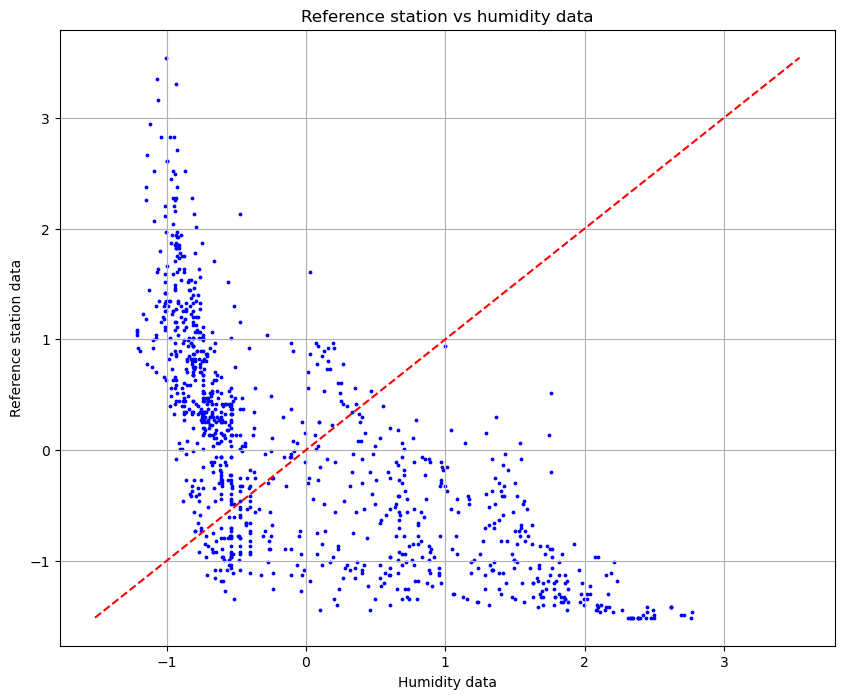

In [67]:
plt.figure(figsize=(10, 8))
plt.scatter(normal_hum_dataset, normal_refSt_dataset, s=3, color='blue')
plt.xlabel('Humidity data')
plt.ylabel('Reference station data')
M = max(max(normal_refSt_dataset), max(normal_hum_dataset))
m = min(min(normal_refSt_dataset), min(normal_hum_dataset))
plt.plot([m, M], [m, M], ls="--",c='red')
plt.grid(True)  # Add grid
plt.title('Reference station vs humidity data')
plt.show()

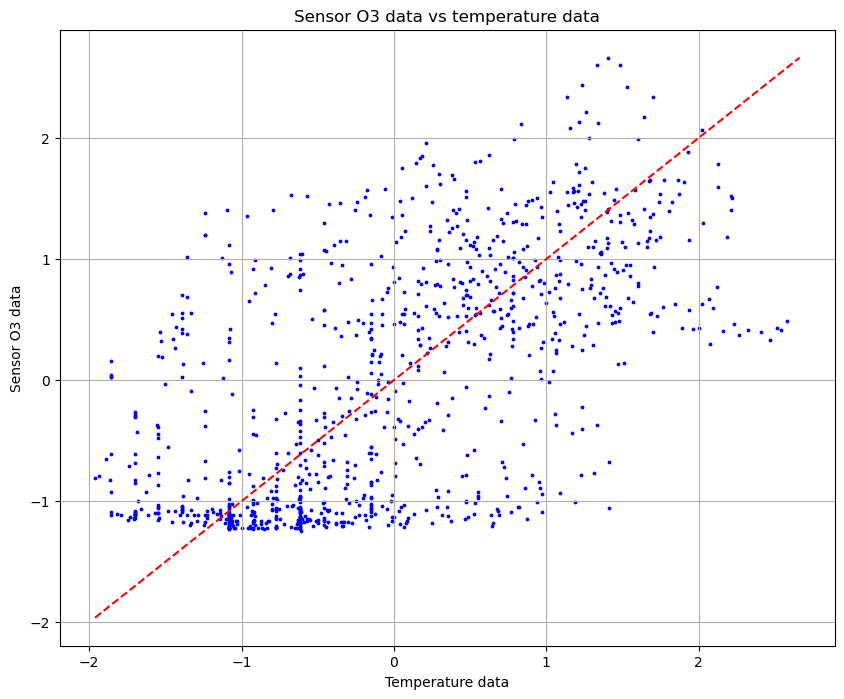

In [68]:
plt.figure(figsize=(10, 8))
plt.scatter(normal_temp_dataset, normal_o3_dataset, s=3, color='blue')
plt.xlabel('Temperature data')
plt.ylabel('Sensor O3 data')
M = max(max(normal_o3_dataset), max(normal_temp_dataset))
m = min(min(normal_o3_dataset), min(normal_temp_dataset))
plt.plot([m, M], [m, M], ls="--",c='red')
plt.grid(True)  # Add grid
plt.title('Sensor O3 data vs temperature data')
plt.show()

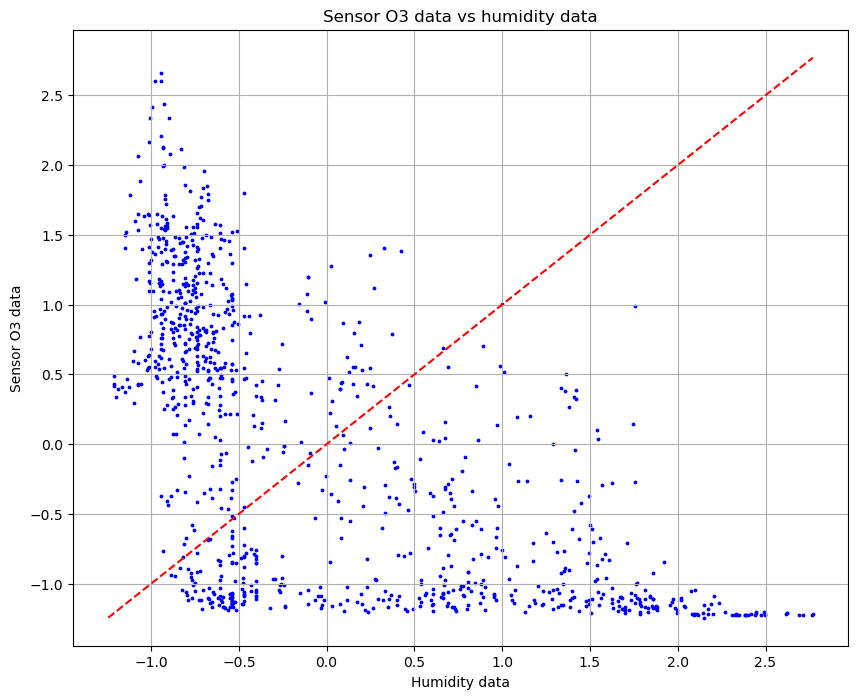

In [69]:
plt.figure(figsize=(10, 8))
plt.scatter(normal_hum_dataset, normal_o3_dataset, s=3, color='blue')
plt.xlabel('Humidity data')
plt.ylabel('Sensor O3 data')
M = max(max(normal_o3_dataset), max(normal_hum_dataset))
m = min(min(normal_o3_dataset), min(normal_hum_dataset))
plt.grid(True)  # Add grid
plt.plot([m, M], [m, M], ls="--",c='red')
plt.title('Sensor O3 data vs humidity data')
plt.show()

Now I will get the training and the validation set from the reference dataset. The training set is the 70% of the total data and the validation set is the remaining 30%. I took these two set picking randomply values from the reference dataset. I use all the variables and apply the multi linear regression

theta_0: 64.34913997443911
[theta_1, theta_2, theta_3]: [26.78503489 16.08635653 -0.79317507]
RMSE = 13.00976185998165
r_square: 0.8907681244018592


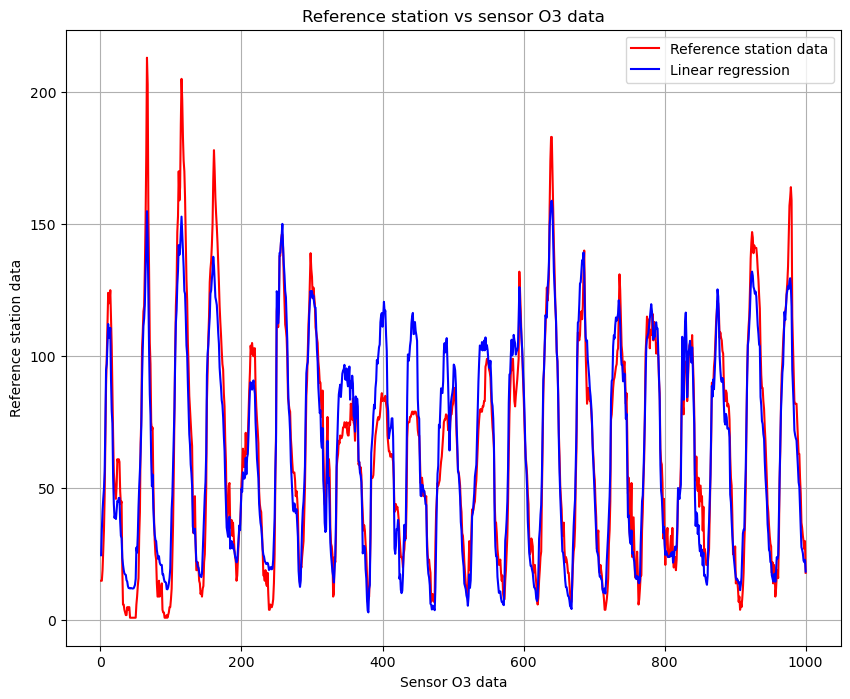

In [77]:
data_training_set = [list(a) for a in zip(sensor_o3_dataset, temp_dataset, hum_dataset)]
normal_data_training_set = [list(a) for a in zip(normal_o3_dataset, normal_temp_dataset, normal_hum_dataset)]

y_train, y_test, x_train, x_test = train_test_split(refSt_dataset, normal_data_training_set, test_size=0.3, random_state=42)

x = np.array(x_train)
y = np.array(y_train)

model.fit(x, y)

r_sq = model.score(x, y)

print(f"theta_0: {model.intercept_}")
print(f"[theta_1, theta_2, theta_3]: {model.coef_}")

# y_pred = model.predict(np.array(normal_x_test_set))
y_pred = model.predict(np.array(x_test))
rmse = calculate_rmse(y_pred, y_test)
print(f"r_square: {r_sq}")

# var = np.std()**2

fun_to_plot = []
for i in range(len(normal_o3_dataset)):
    fun_to_plot.append(model.intercept_ + model.coef_[0] * normal_o3_dataset[i] + model.coef_[1] * normal_temp_dataset[i] + model.coef_[2] * normal_hum_dataset[i] + error)

lower_bound = 0
upper_bound = 1000
plt.figure(figsize=(10, 8))
# plt.scatter(index_list[lower_bound:upper_bound], x_ordered[lower_bound:upper_bound], s=3, color='blue')
plt.plot(index_list[lower_bound:upper_bound], refSt_dataset[lower_bound:upper_bound], color='red', label='Reference station data')
plt.plot(index_list[lower_bound:upper_bound], fun_to_plot[lower_bound:upper_bound], color='blue', label='Linear regression')
plt.grid(True)  # Add grid
plt.legend()
plt.xlabel('Sensor O3 data')
plt.ylabel('Reference station data')
plt.title('Reference station vs sensor O3 data')
plt.show()

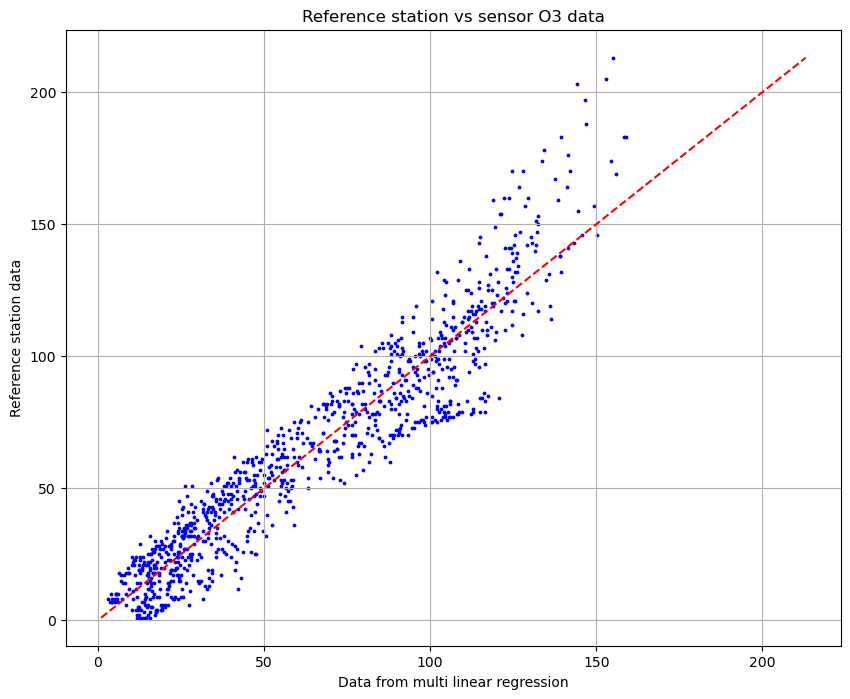

In [78]:
plt.figure(figsize=(10, 8))
plt.scatter(fun_to_plot, refSt_dataset, s=3, color='blue')
plt.xlabel('Data from multi linear regression')
plt.ylabel('Reference station data')
plt.grid(True)  # Add grid
M = max(max(refSt_dataset), max(fun_to_plot))
m = min(min(refSt_dataset), min(fun_to_plot))
plt.plot([m, M], [m, M], ls="--",c='red')
plt.title('Reference station vs sensor O3 data')
plt.show()